In [2]:
# Importing all libraries required in this notebook
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline

In [3]:
# Reading csv data file from the link
url = "http://bit.ly/w-data"
s_data = pd.read_csv(url)
print("Data imported successfully")

s_data.head()

Data imported successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


<Figure size 648x720 with 0 Axes>

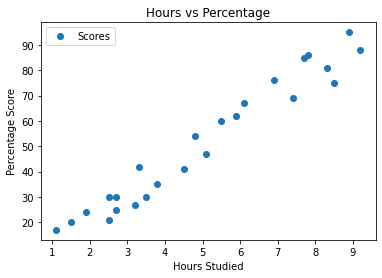

In [12]:
# Plotting the distribution of scores in 2-D Graph
plt.figure(figsize=[9,10])
s_data.plot(x='Hours', y='Scores', style='o')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied') 
plt.ylabel('Percentage Score')  
plt.show()

In [13]:
# we have to divide the test data into train data like  "attributes" (inputs) and "labels" (outputs).
X = s_data.iloc[:, :-1].values  
y = s_data.iloc[:, 1].values  


In [14]:
#  Now we are splitting this data into training and test sets.
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                            test_size=0.2, random_state=0) 

In [16]:
# We have split our data into training and testing sets, and now we have to train our algorithm.
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(X_train, y_train) 

print("Training completed")

Training completed


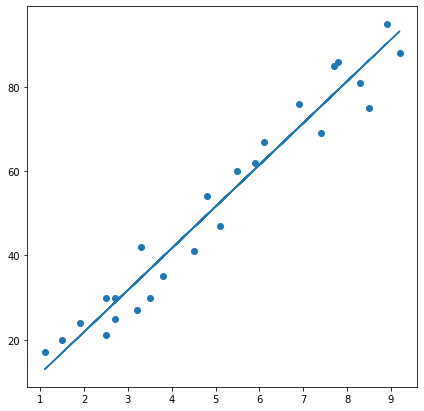

In [21]:
# Plotting the regression line
line = regressor.coef_*X+regressor.intercept_

# Plotting for the test data
plt.figure(figsize=[7,7])
plt.scatter(X, y)
plt.plot(X, line);
plt.show()

In [22]:
# we have trained our data and now we have to make some predictions
print(X_test) # Testing data - In Hours
y_pred = regressor.predict(X_test) # Predicting the scores

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [23]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df 

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [28]:
# Now testing my own data
hours = 9.25
own_pred = regressor.predict([[hours]])
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = 9.25
Predicted Score = 93.69173248737539


In [29]:
# evaluating the model using Mean Square Error
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_pred)) 

Mean Absolute Error: 4.183859899002982
